In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/netflix_titles.csv')


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe(include='all').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN


Handling the missing values

In [10]:
data = df.copy()
data[['director','cast','country']] = df.loc[:,['director','cast','country']].fillna('NA')

In [11]:
data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)


In [12]:
data.rating.fillna(data.rating.mode()[0], inplace=True)

In [13]:
data.rating.value_counts(dropna=False)

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [14]:
data.loc[data.rating.str.contains('min'),'duration'] = data.loc[data.rating.str.contains('min'),'rating']
data.loc[data.rating.str.contains('min'),'rating'] = data.rating.mode()[0]

In [15]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [42]:
def explode_data(df, col : str, name : str, along:str = 'year_added'):
    return (
    data
        [col]
        .apply(lambda x: x.replace(', ', ',').replace(' ,', ',').split(','))
        .to_frame()
        .set_index(data[along])
        .explode(col)
        .replace('', np.nan)
        .replace('NA', np.nan)
        .dropna()
        .stack()
        .to_frame()
        .reset_index()
        .drop('level_1', axis=1)
        .rename(columns={0:name})
)

converting type of columns


In [17]:
data.date_added = pd.to_datetime(data.date_added)
data['year_added'] = data.date_added.dt.year
data['month_added'] = data.date_added.dt.month_name()
data['day_added'] = data.date_added.dt.day_name()

In [18]:
data = data.astype({
    'type':'category',
    'rating':'category'
})

**Analysis and Visualization**

In [19]:
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

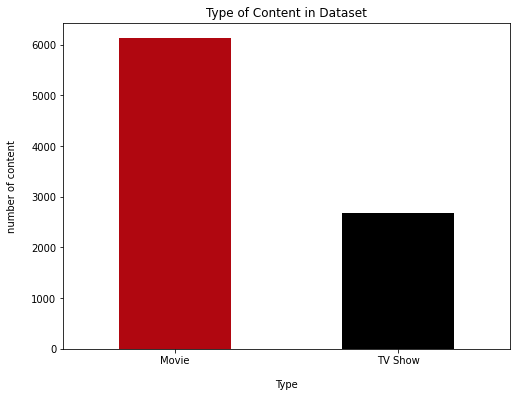

In [20]:
ax = data.type.value_counts().plot(kind = 'bar',figsize=(8,6), rot=0, color=["#B00710","#000000"])

ax.set_xlabel('Type', labelpad =14)
ax.set_ylabel('number of content', labelpad=14)
ax.set_title('Type of Content in Dataset')
plt.show()

Netflix contains more number of movies than TV shows.


<function matplotlib.pyplot.show(*args, **kw)>

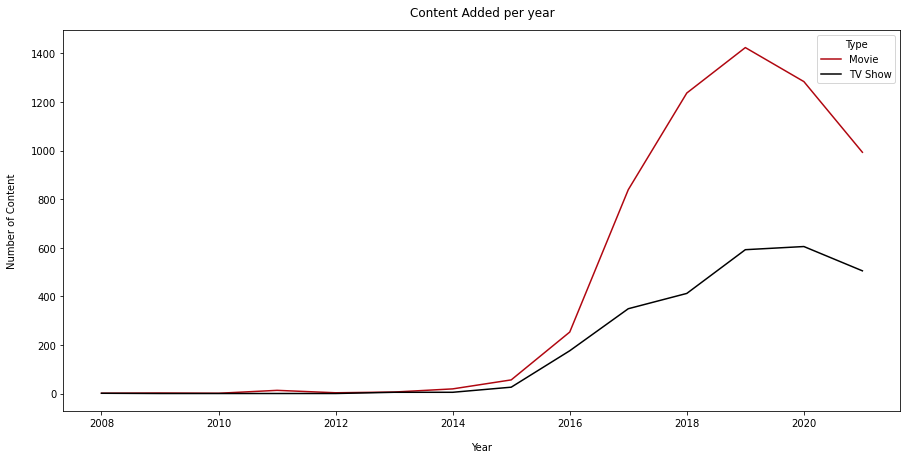

In [21]:
df = data.groupby('year_added')['type'].value_counts().reset_index()
df = df.rename(columns ={'level_1':'Type' ,'type':'count'})
fig,  ax =plt.subplots(figsize=(15,7))

sns.lineplot(x='year_added',y='count',data = df, hue ='Type', palette=["#B00710","#000000"])

ax.set_xlabel('Year', labelpad = 14)
ax.set_ylabel('Number of Content', labelpad= 14)
ax.set_title('Content Added per year', pad = 14)
plt.show

In 2015, Netflix's content had a rise in both the types (movies and tv shows).
Overall comparision states that netflix had the most released content in the year 2019 after that we can see a downfall due to covid crisis.


<function matplotlib.pyplot.show(*args, **kw)>

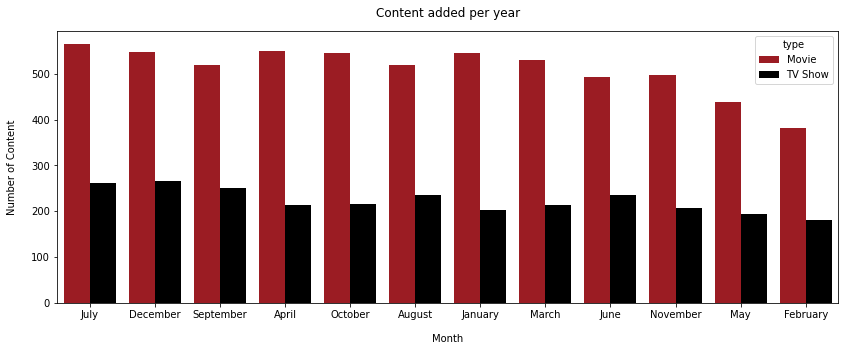

In [22]:
fig, ax = plt.subplots(figsize=(14,5))

ax = sns.countplot(x='month_added', data = data,hue='type', order= data.month_added.value_counts().index,
                   palette=["#B00710","#000000"])

ax.set_xlabel('Month', labelpad = 14)
ax.set_ylabel('Number of Content', labelpad = 14)
ax.set_title('Content added per year', pad=14)
plt.show

July and December has the most number of release in the year.
In comparison more movies are released than the TV shows.




<function matplotlib.pyplot.show(*args, **kw)>

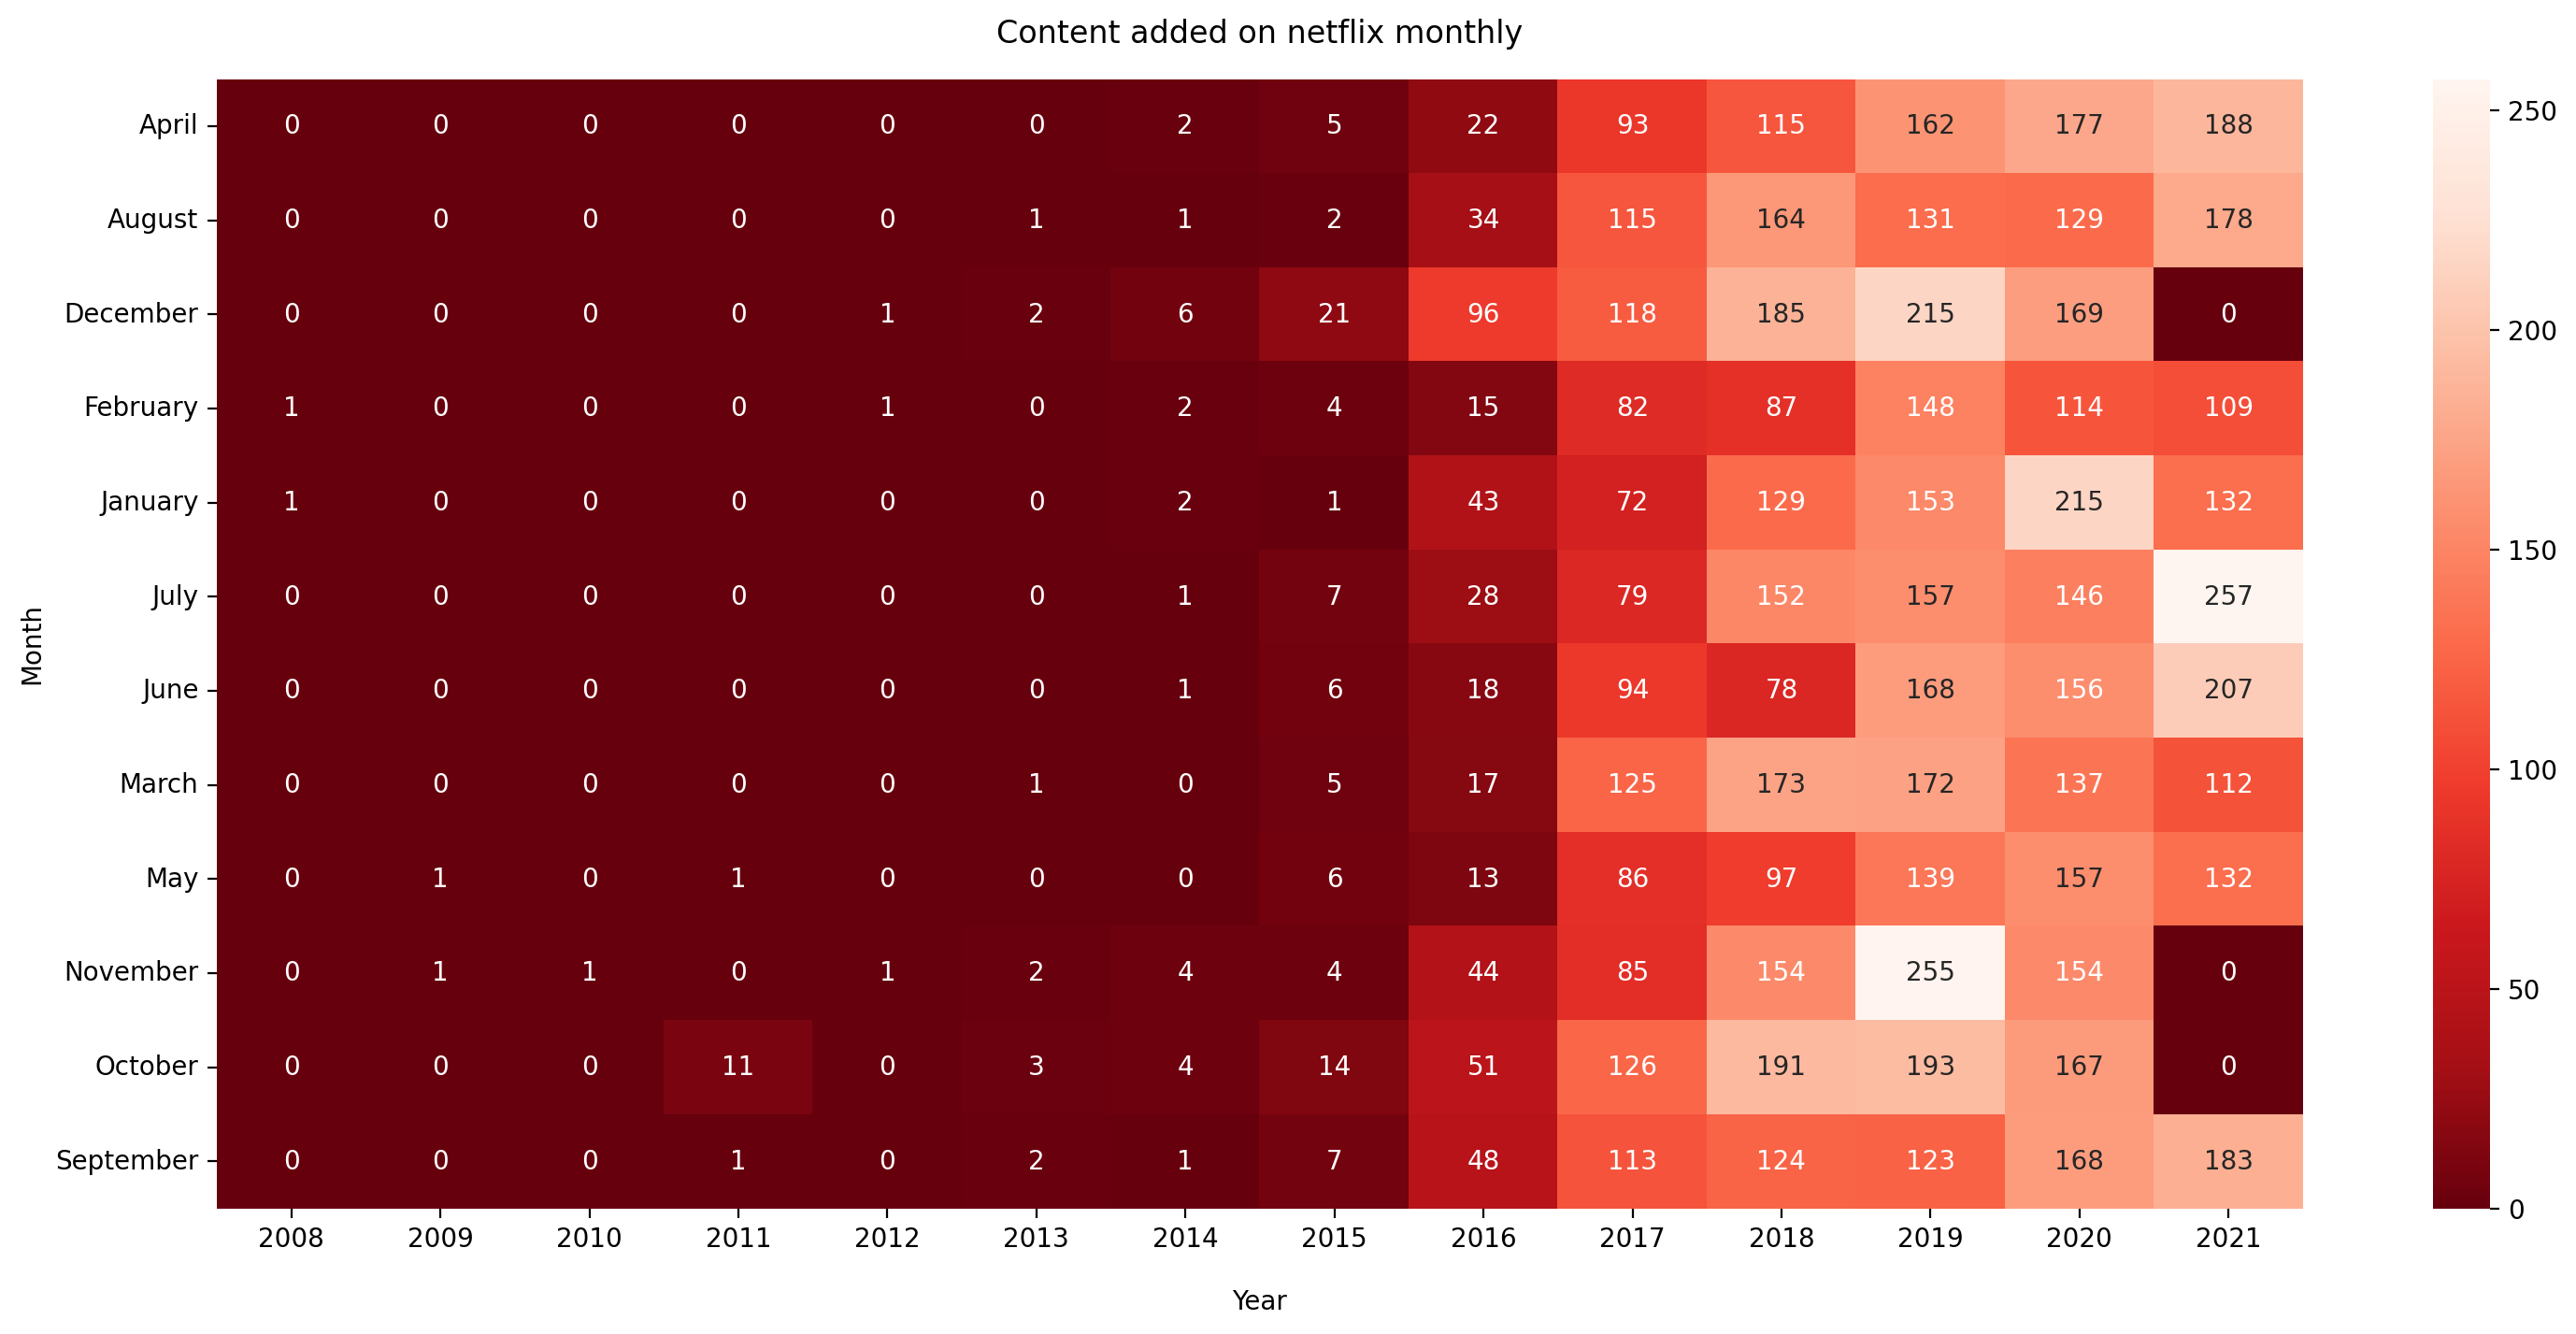

In [23]:
# - What is the count of content added monthly per year?

year_month_count = (
    data.loc[:,['year_added','month_added']]
    .value_counts()
    .reset_index()
    .rename(columns={0:'count'})
    .pivot('month_added','year_added','count')
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8),dpi=200)
ax = sns.heatmap(year_month_count, annot=True, fmt="d", cmap='Reds_r')
ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Month')
ax.set_title('Content added on netflix monthly',pad=14)
plt.show

Conclusion:
Before 2021 content added in July is not very high.
If we not consider the content added in 2021 as we don't have data for all months then more content is added in October, November and December.
For year 2021 we don't have data after september.


<function matplotlib.pyplot.show(*args, **kw)>

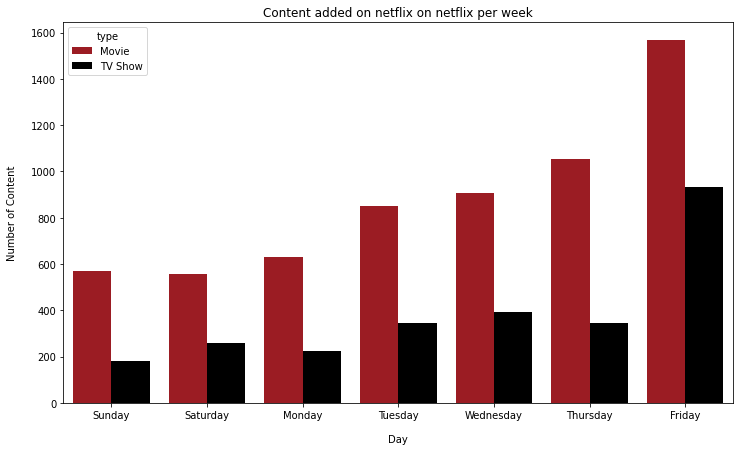

In [24]:
#On which week netflix added most content?
plt.figure(figsize=(12,7))
ax = sns.countplot(x='day_added',data = data, hue = 'type',
                   order=data.day_added.value_counts().sort_values().index,
                   palette=["#B00710","#000000"])
ax.set_xlabel('Day', labelpad=14)
ax.set_ylabel('Number of Content', labelpad= 14)
ax.set_title('Content added on netflix on netflix per week')
plt.show

Conclusion:
Large number of content added on Friday after Thursday.
Also significant number of TV Show released on Friday than other days

<function matplotlib.pyplot.show(*args, **kw)>

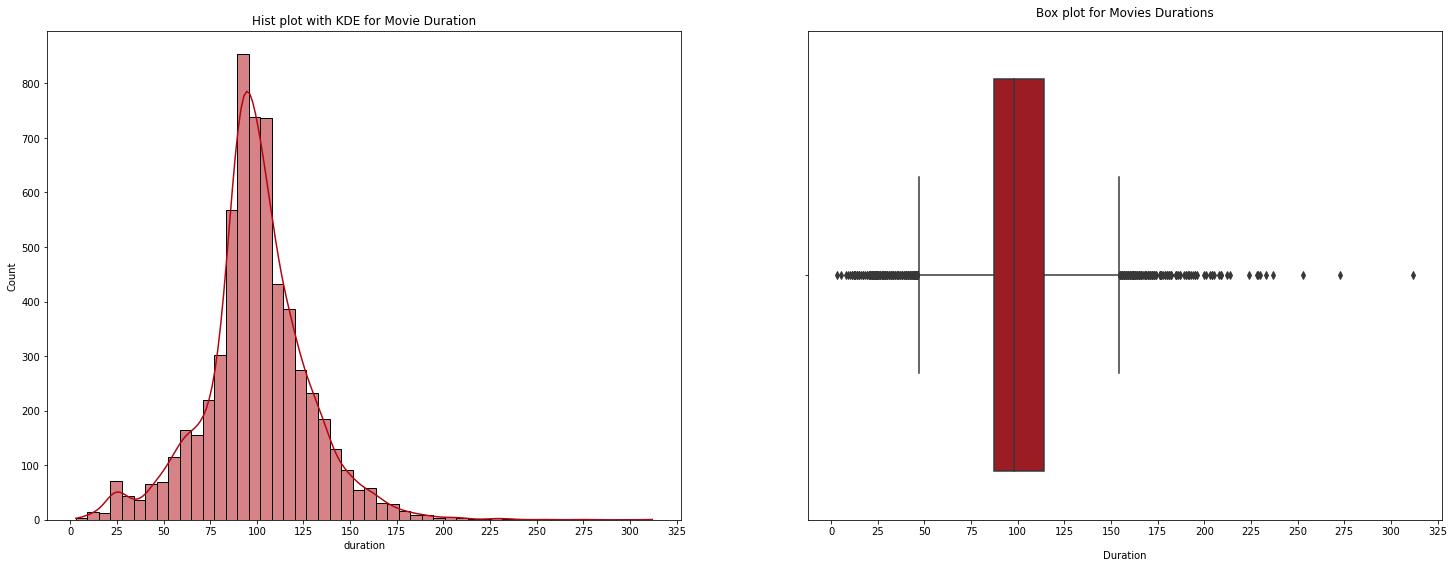

In [25]:
# - What is the most common durations of Movies?

movie_durations = data[data['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

#hist plot with KDE
fig, ( ax1 , ax2 ) = plt.subplots(1,2, figsize = (25,9))
g = sns.histplot(movie_durations, kde = True, color = "#B00710" , bins = 50 , ax = ax1)
ax1.set_title('Hist plot with KDE for Movie Duration')
g.set(xticks = np.arange(0,350,25))

#Boxplot
sns.boxplot(x=movie_durations , color = "#B00710" , ax = ax2)
ax2.set_xticks(np.arange(0,350,25))
ax2.set_xlabel('Duration', labelpad= 14)
ax2.set_title('Box plot for Movies Durations', pad=14)
plt.show

Conclusion
Generally Movies have duration range around 100.
Also around 25 minutes there is a increase in count that is because of short films.

<function matplotlib.pyplot.show(*args, **kw)>

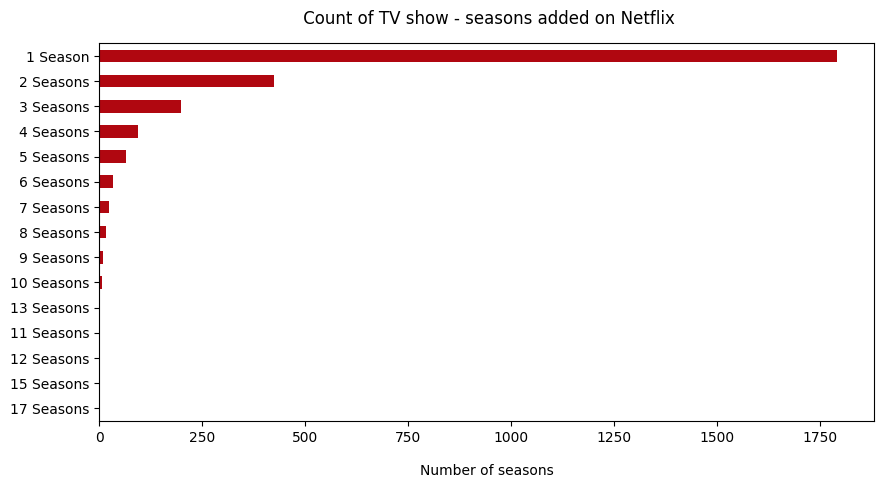

In [26]:
# - What is the most common number of seasons released on Netflix?

seasons = data[data['duration'].str.contains('Season')]['duration']
plt.figure(figsize= (10,5), dpi = 100)
ax = seasons.value_counts().sort_values().plot(y='duration', kind = 'barh', color=["#B00710"])
ax.set_title('Content added per week day')
ax.set_xlabel('Number of seasons', labelpad=14)
ax.set_title(' Count of TV show - seasons added on Netflix', pad = 14)
plt.show

Conclusion-
There is a significant drop of count of seasons after season 1.
Tv shows are of 1 - 2 Seasons mostly

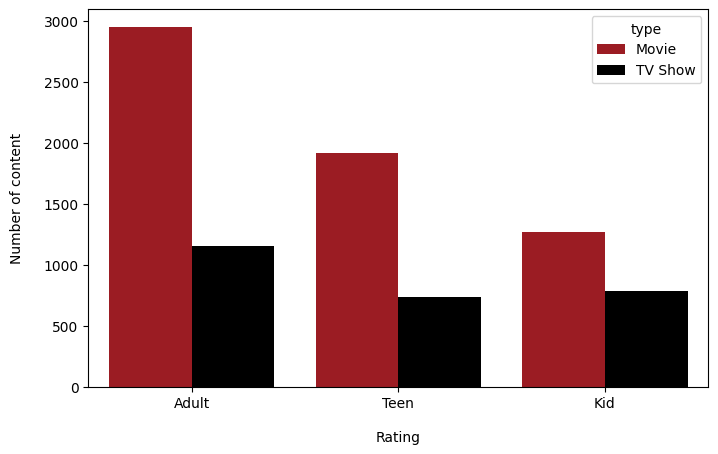

In [27]:
# - What is the count of content added as per audiance type?

 #We are dividing audiance in three types as per rating column

Kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
Teens = ['PG-13', 'TV-14']
Adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def rate(x):
    if x in Kids:
        return 'Kid'
    elif x in Teens:
        return 'Teen'
    elif x in Adults:
        return 'Adult'
    
df1 = data['rating'].apply(rate)
df2 = pd.concat([df1, data['type']], axis=1)
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='rating',data=df2, hue='type', order=['Adult', 'Teen', 'Kid'], palette=["#B00710","#000000"])
ax.set_ylabel('Number of content', labelpad=14)
ax.set_xlabel('Rating', labelpad=14)
plt.show()

Conclusion
Netflix added alot of adults movies as compare to adult TV shows.
Adult and Teen content is the most common content on netflix.

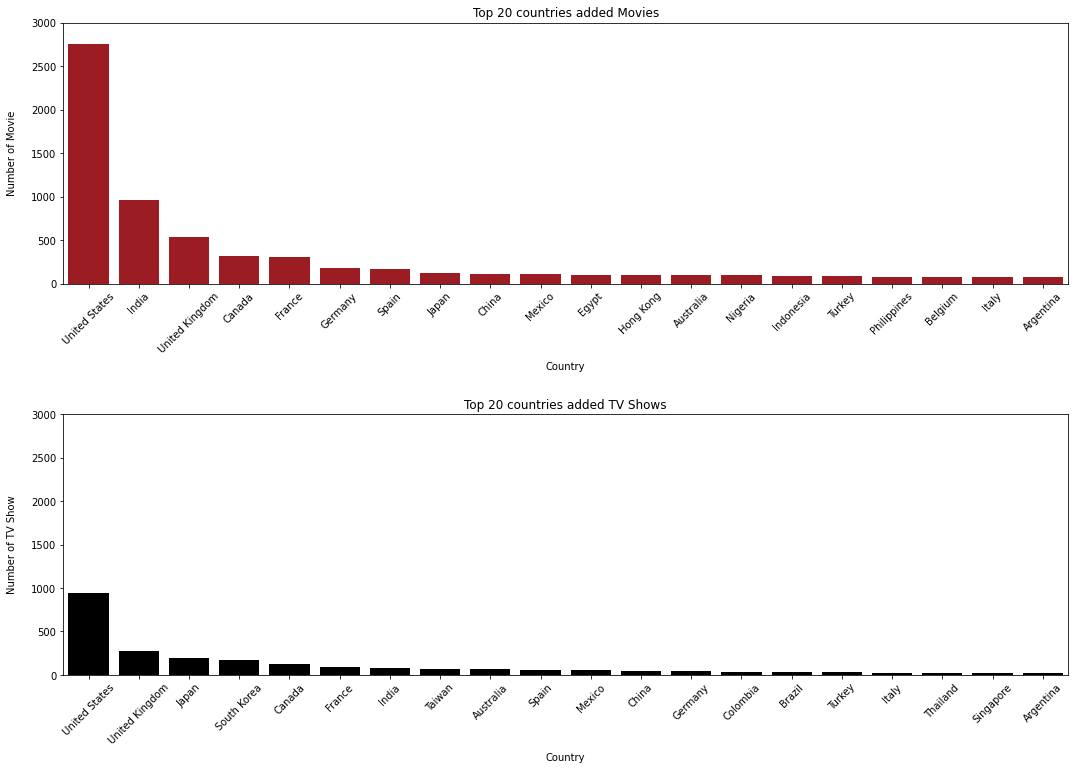

In [44]:
# - What is the count of content added for Top 20 countries in the respective content types?

country_data = explode_data(data, 'country', 'country', 'type')
df = country_data.value_counts().reset_index(level=1)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,12))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='country',y =0, data=df.loc['Movie'].head(20), color="#B00710", ax=ax1, )
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_title('Top 20 countries added Movies')
ax1.set_ylabel('Number of Movie', labelpad=14)
ax1.set_xlabel('Country', labelpad=7)
ax1.set_yticks(np.arange(0,3500,500))


sns.barplot(x='country',y =0, data=df.loc['TV Show'].head(20), color="#000000", ax = ax2)
ax2.set_title('Top 20 countries added TV Shows')
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_ylabel('Number of TV Show', labelpad=14)
ax2.set_xlabel('Country', labelpad=7)
ax2.set_yticks(np.arange(0,3500,500))
plt.show()

Conclusion:
The order of top 20 Movie and TV Show is different.
In countries like India, Spain, Germay Movies are more popular than TV Shows.
In countries like Japan, South Korea, Taiwan TV Shows are more popular than Movies.

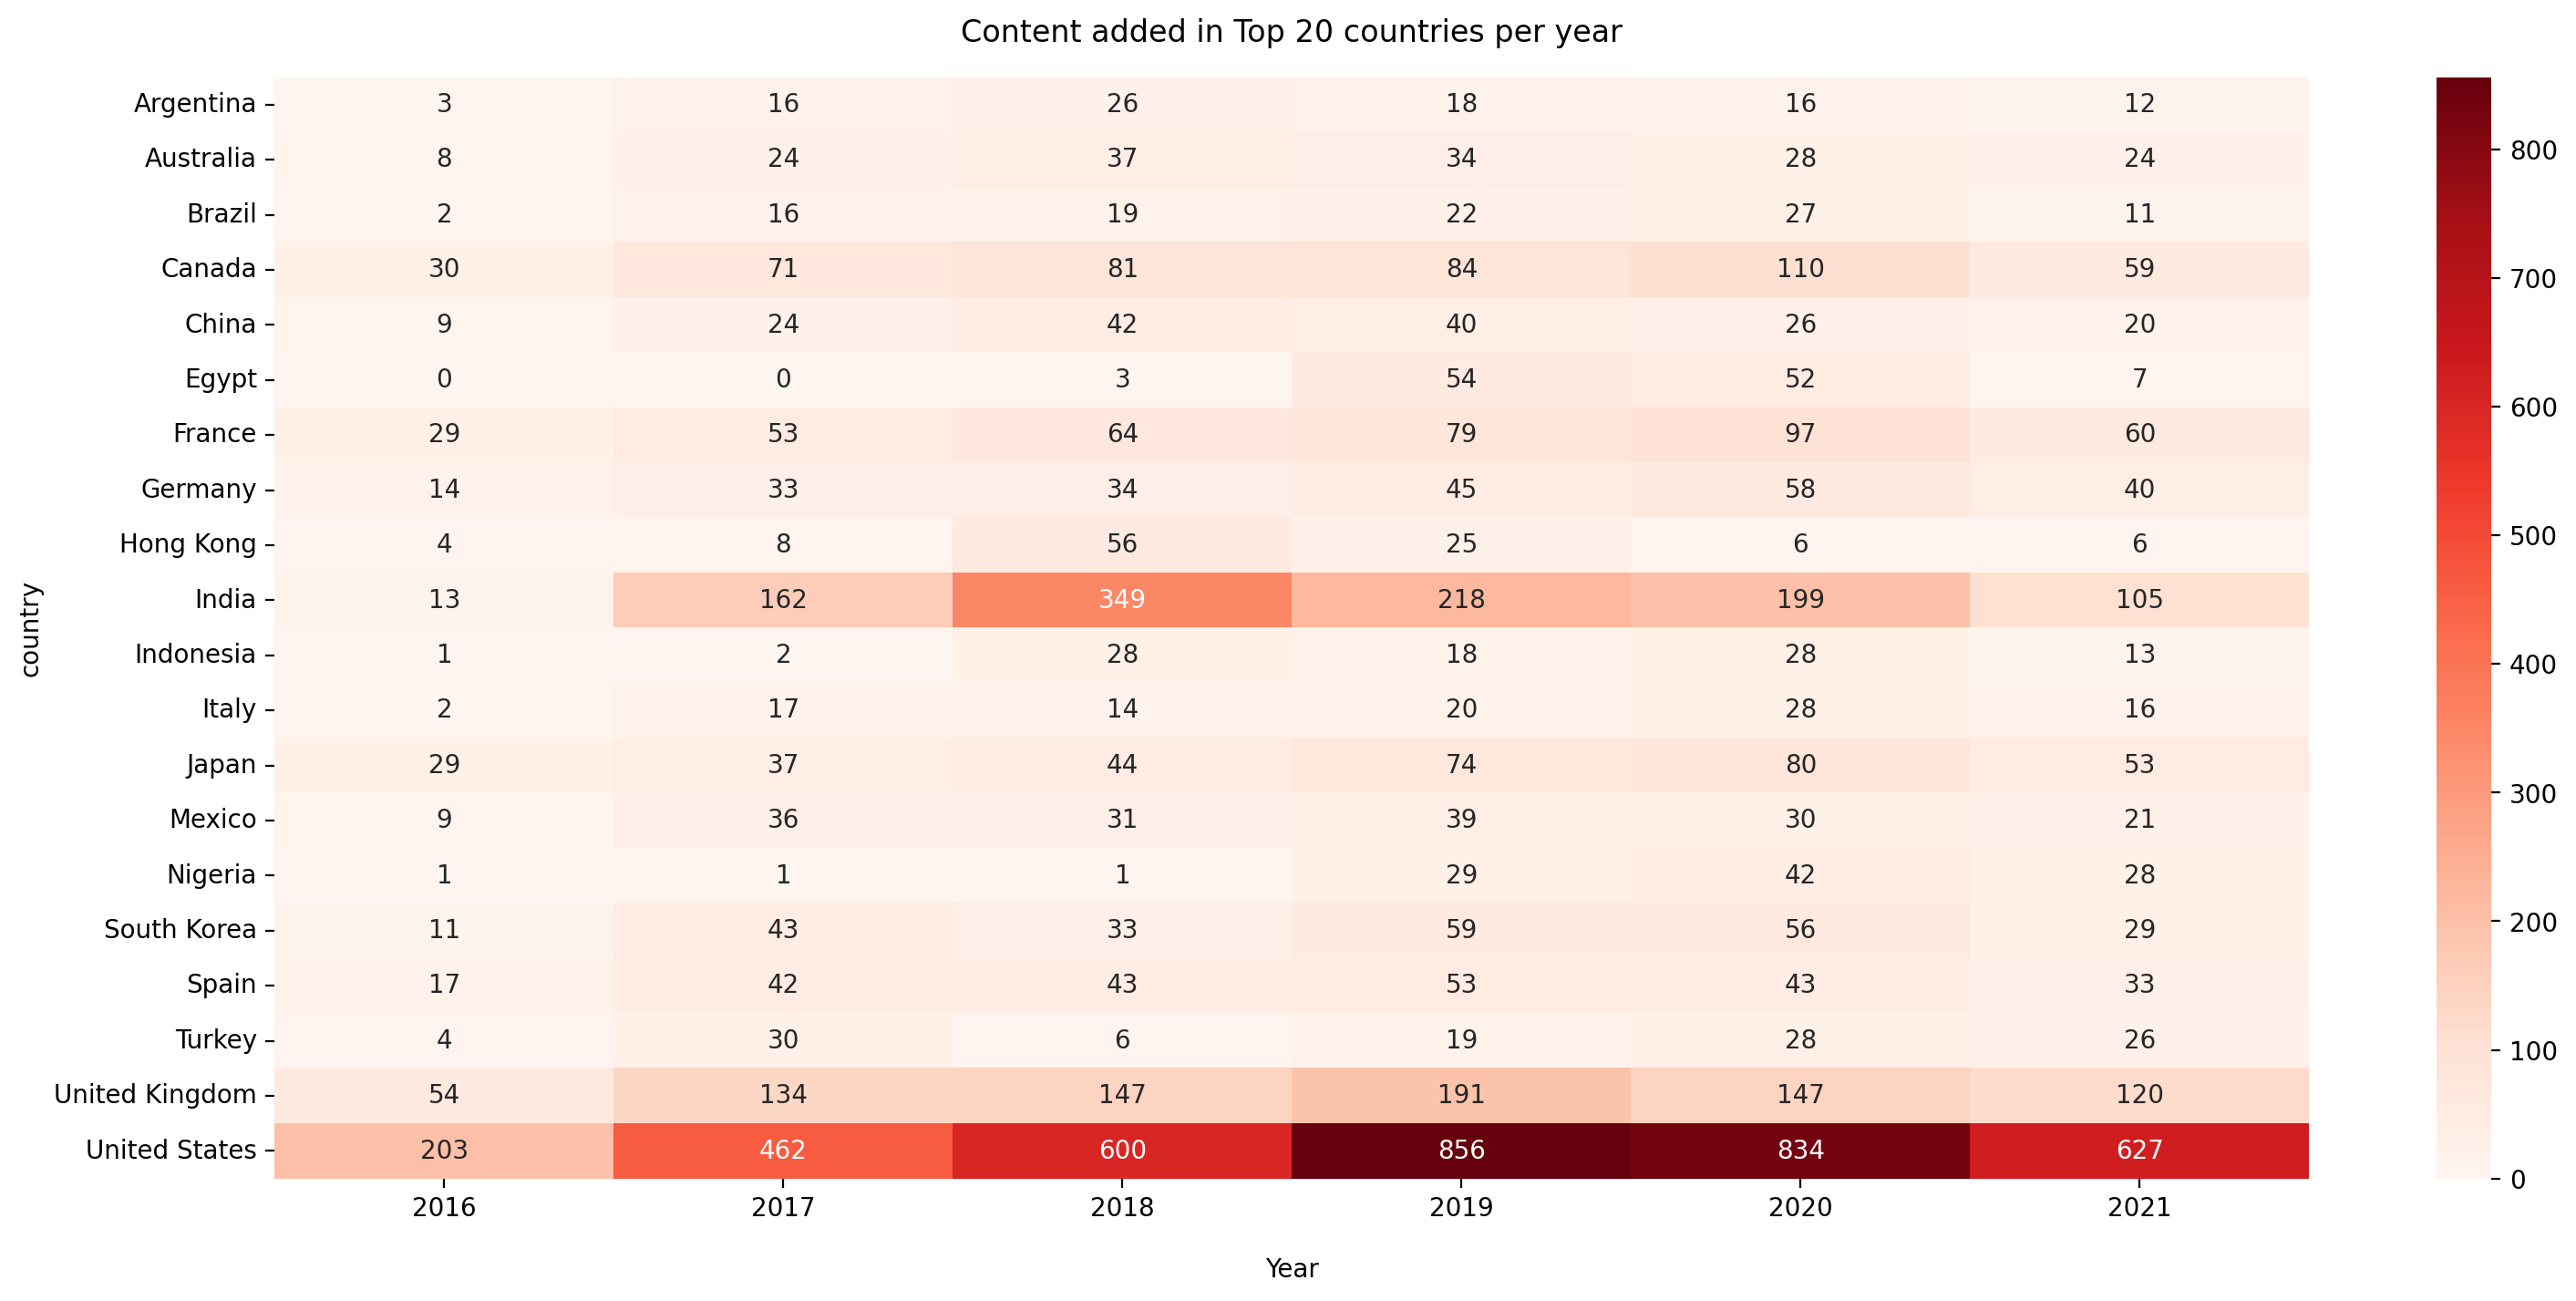

In [45]:
# - What is the count of content added for Top 20 countries per year?

country_data = explode_data(data, 'country', 'country')

country_data = country_data[country_data['year_added']>2015]
country_data = (
    country_data
    [country_data['country'].isin(country_data['country'].value_counts().head(20).index)]
    .value_counts()
    .reset_index()
    .pivot("country", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(country_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Year', labelpad=14)
ax.set_title('Content added in Top 20 countries per year', pad=14)
plt.show()

Conclusion:
Top 5 countries where netflix is adding more content per year except United States are India, United Kingdom, Canada, France and Japan.

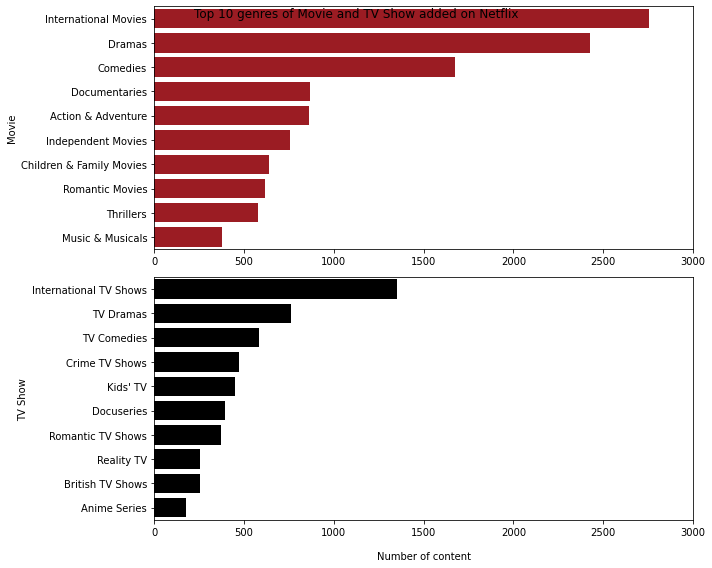

In [46]:
# - What are the top genres popular on netflix?

genre_data = explode_data(data, 'listed_in', 'genre', 'type')
df = genre_data.value_counts().reset_index(level=1)

fig, ax = plt.subplots(2,1, figsize=(10, 8))

fig.subplots_adjust(hspace=0.9)
sns.barplot(x=0,y ='genre', data=df.loc['Movie'].head(10), color="#B00710", ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Movie')
ax[0].set_xticks(np.arange(0,3500,500))

sns.barplot(x=0,y ='genre', data=df.loc['TV Show'].head(10), color="#000000", ax=ax[1])
ax[1].set_xlabel('Number of content', labelpad=14)
ax[1].set_ylabel('TV Show')
ax[1].set_xticks(np.arange(0,3500,500))
fig.suptitle('Top 10 genres of Movie and TV Show added on Netflix')
fig.tight_layout()

Conclusion:
TV Show genres Crime TV Shows and Kids' TV are more popular than their similar genre in Movies.
Movie genres Documentaries and Action & Adventure are more popular than their similar genre in TV Show.

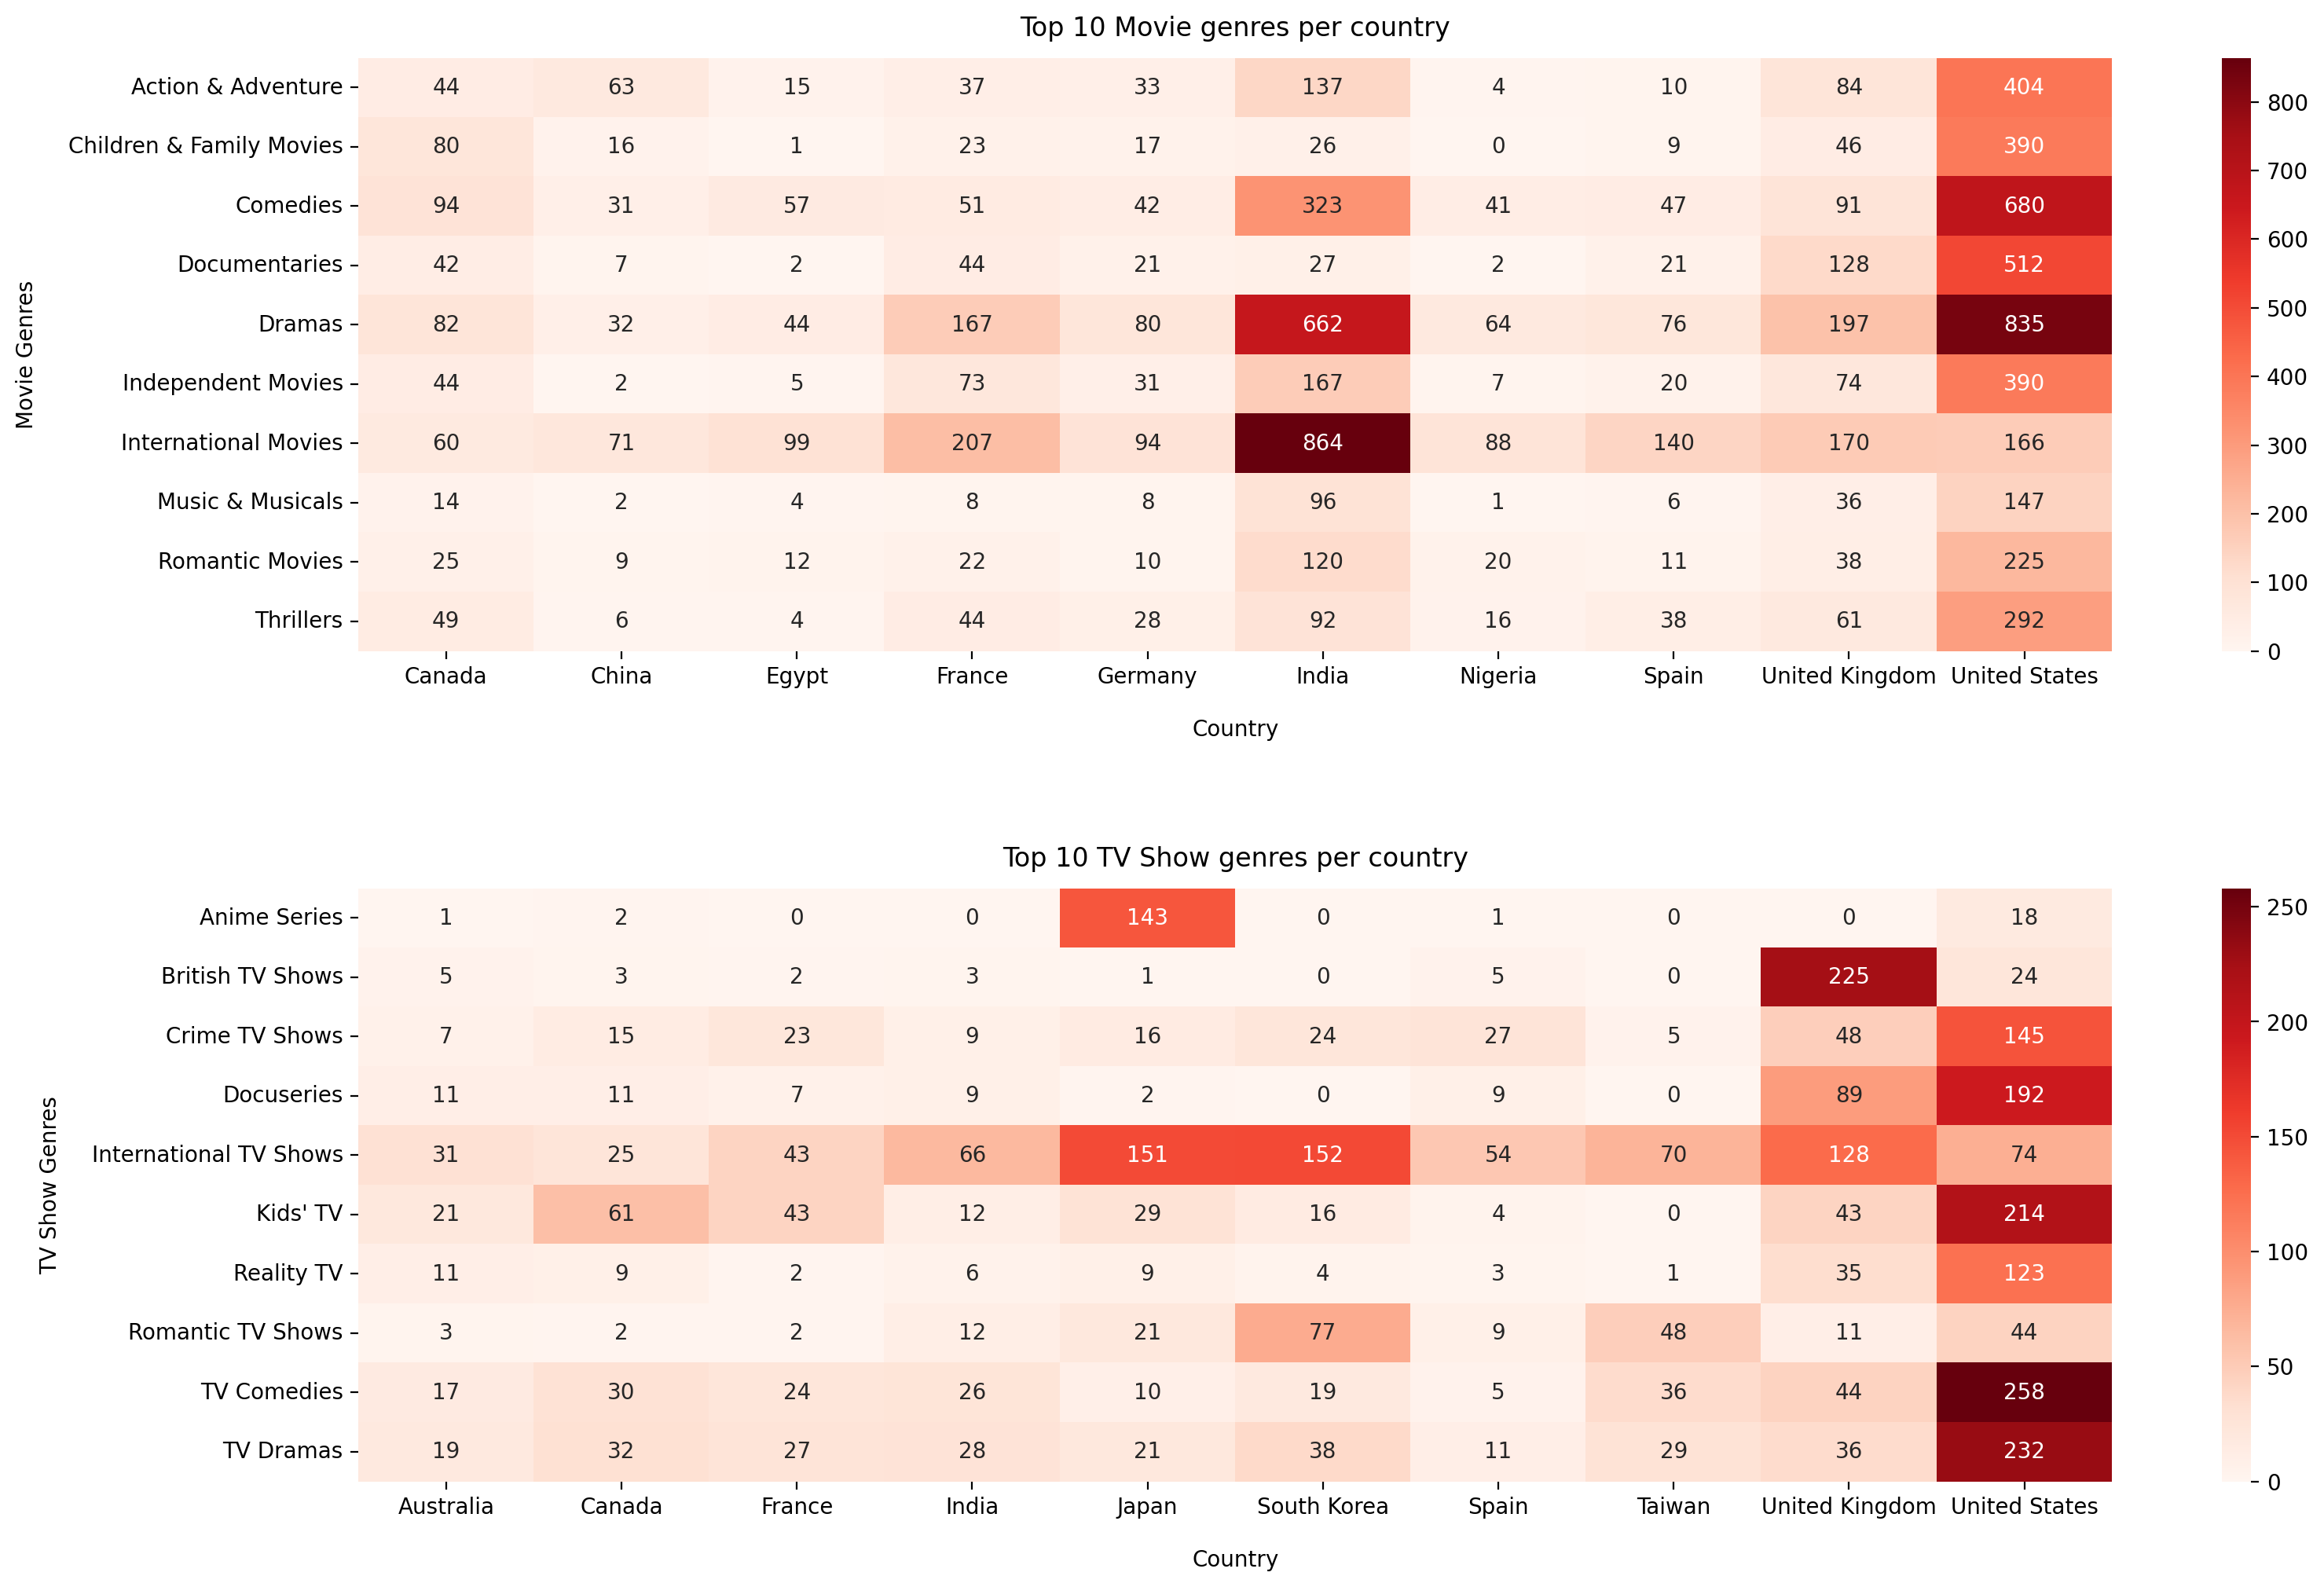

In [47]:
# What are the most popular genres added mostly in Top 10 country on Netflix?

country_data = explode_data(data, 'country', 'country', 'title')
genre_data = explode_data(data, 'listed_in', 'genre', 'title')
genre_data_type = explode_data(data, 'listed_in', 'genre', 'type')

genre_data_type = genre_data_type.value_counts().reset_index(level=1)
top_movie_genres = list(genre_data_type.loc['Movie'].head(10)['genre'].values)
top_tv_genres = list(genre_data_type.loc['TV Show'].head(10)['genre'].values)

df = country_data.merge(genre_data).drop('title', axis=1)
df1 = df[df['genre'].isin(top_movie_genres)]
df2 = df[df['genre'].isin(top_tv_genres)]

def make_data(df):
    return (
        df
        [df['country'].isin(df['country'].value_counts().head(10).index)]
        .value_counts()
        .reset_index()
        .pivot("genre", "country", 0)
        .fillna(0)
        .apply(lambda x: x.astype('int'))
        )

df1 = make_data(df1)
df2 = make_data(df2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,12), dpi=200)
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df1, annot=True, fmt="d", cmap='Reds', ax=ax1)
ax1.set_xlabel('Country', labelpad=14)
ax1.set_ylabel('Movie Genres', labelpad=14)
ax1.set_title('Top 10 Movie genres per country', pad=10)

sns.heatmap(df2, annot=True, fmt="d", cmap='Reds', ax=ax2)
ax2.set_xlabel('Country', labelpad=14)
ax2.set_ylabel('TV Show Genres', labelpad=14)
ax2.set_title('Top 10 TV Show genres per country', pad=10)
plt.show()

Conclusion : Dramas and International movies are most popular genres added mostly in Top 10 countries on Netflix.


In [43]:
cast_data = explode_data(data, 'cast', 'cast')
cast_data[cast_data['year_added']>=2019]['cast'].value_counts().head(10)


Julie Tejwani        33
Rupa Bhimani         31
Rajesh Kava          26
Jigna Bhardwaj       23
Samuel L. Jackson    22
Takahiro Sakurai     22
Amitabh Bachchan     20
Naseeruddin Shah     19
Anupam Kher          19
Yuki Kaji            18
Name: cast, dtype: int64

Conclusion:
In recent years netflix has added content in which top people casted are generally Voice actors. So no clear indication we can get from this data.
As voice artists have majorly worked in animated movies/Tv shows that is not in Top genres in recent years.

In [57]:
director_data = explode_data(data, 'director', 'director')
director_data[director_data['year_added']>=2019]['director'].value_counts().head(10)

Rajiv Chilaka          22
Suhas Kadav            15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg        9
Kunle Afolayan          8
Hanung Bramantyo        8
Robert Rodriguez        8
Clint Eastwood          7
Name: director, dtype: int64

Conclusion:
Same pattern we can see here, the top 2 director who directed most movies/Tv shows is for animated content added in recent years.

In [58]:
cast_data = explode_data(data, 'cast', 'cast', 'type')
cast_data.value_counts().loc['Movie'].head(10)

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Boman Irani         27
Rupa Bhimani        27
dtype: int64

Conclusion:
We can see that in top 10 Movie cast, most people is from India.

In [60]:
cast_data.value_counts().loc['TV Show'].head(10)

cast
Takahiro Sakurai      25
Yuki Kaji             19
Junichi Suwabe        17
Ai Kayano             17
Daisuke Ono           17
Yuichi Nakamura       16
Yoshimasa Hosoya      15
Jun Fukuyama          15
David Attenborough    14
Hiroshi Kamiya        13
dtype: int64

Conclusion:
We can see that in top 10 TV Show cast, most people is from Japan

**Summary:**

* Netflix added more Movie than TV Show.

* After 2019 there is a drop in content added. Drop in Movie content is more than TV Show content.

*  If we not consider the content added in 2021 as we don't have data for all months then more content is added in October, November and December.

*   More content for adults is there on Netflix.


* Most of the content is added on Friday and Thursday respectively.

*  United states has added most content on Netflix.


* Top 5 countries where netflix is adding more content per year except United States are India, United Kingdom, Canada, France and Japan.

*  Five most popular genres in recent years are International movies, Dramas, Comedies, International TV Shows and Action & Adventure .

**TV Show:**



*   Large number of TV Show added on Friday than other weekday.

*  TV Shows have mostly season 1 and season 2 respectively.



*   In countries like United Kingdom, Japan, South Korea, Taiwan TV Shows are more popular than Movies.

*   Top 5 countries where movies added are United States, United Kingdom, Japan, South Korea and Canada.


*   Top 3 genres in Movies are International TV Shows, TV Dramas and TV Comedies.

*  Top people casted in TV Shows are from Japan.












